In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
from scipy import stats

df = pd.read_csv('weight-height.csv')


In [3]:
df.shape

(10000, 3)

In [4]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [5]:
df.info

<bound method DataFrame.info of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]>

In [4]:
df = pd.read_csv('weight-height.csv')
# Проверка на уникальность
if df.duplicated().any():
    print("Датасет содержит дубликаты")
else:
    print("Дубликатов не найдено")

# Идентификация пустот
missing_values = df.isnull().sum()
print("Пустые значения в датасете:")
print(missing_values)

# Замена пустот средними значениями или нулями

x = df.fillna(0)

# Проверка на отсутствие пустот
if df.isnull().sum().sum() == 0:
    print("Пустоты успешно заменены")
else:
    print("Остались пустоты в датасете")
x

Дубликатов не найдено
Пустые значения в датасете:
Gender    0
Height    0
Weight    0
dtype: int64
Пустоты успешно заменены


Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]

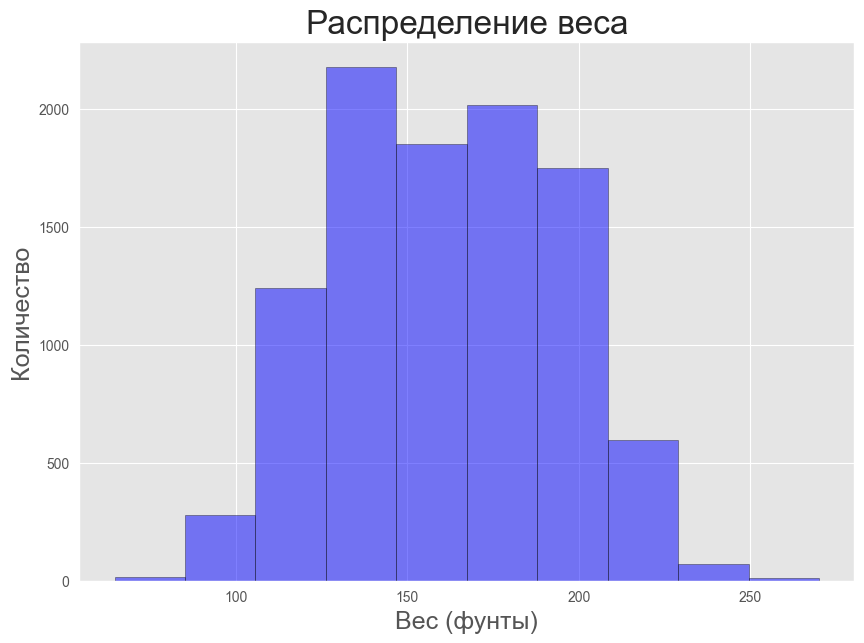

In [5]:
#Гистаграмма для веса
df.Weight.plot(
    kind='hist',
    color='blue',
    edgecolor='black',
    alpha=0.5,
    figsize=(10,7),
)
plt.title('Распределение веса', size=24)
plt.xlabel('Вес (фунты)', size=18)
plt.ylabel('Количество', size=18)
plt.show()

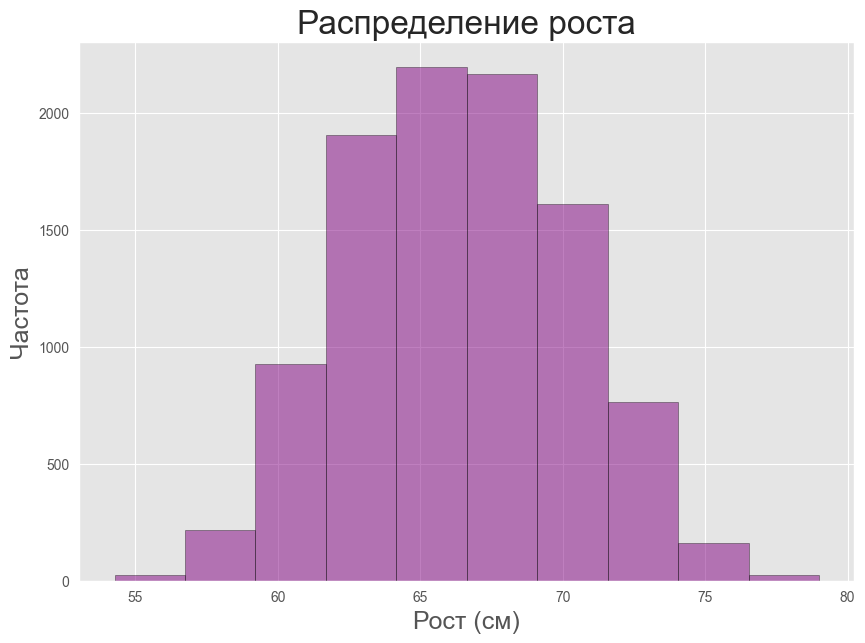

In [8]:
#Histogtram of the height
df.Height.plot(kind='hist',
               color='purple', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.title('Распределение роста', size=24)
plt.xlabel('Рост (см)', size=18)
plt.ylabel('Частота', size=18)
plt.show()

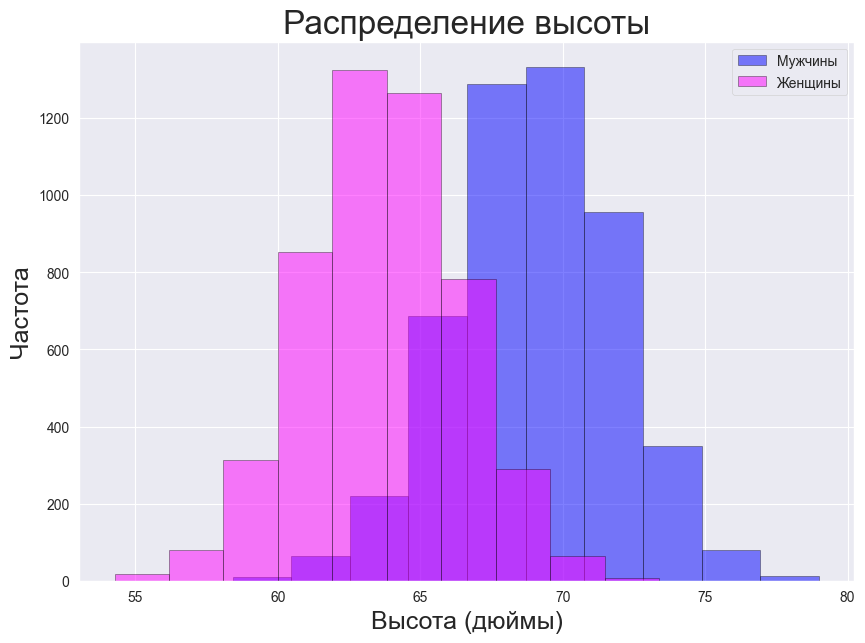

In [16]:
#Также можно построить распределение роста и веса мужчин и женщин в разделенных гистограммах. 
#В следующем примере реализовано построение диаграммы роста:
# Histogram of the height for males and females
df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Мужчины', 'Женщины'])
plt.title('Распределение высоты', size=24)
plt.xlabel('Высота (дюймы)', size=18)
plt.ylabel('Частота', size=18)
plt.show()


          Height    Weight
Height  1.000000  0.924756
Weight  0.924756  1.000000


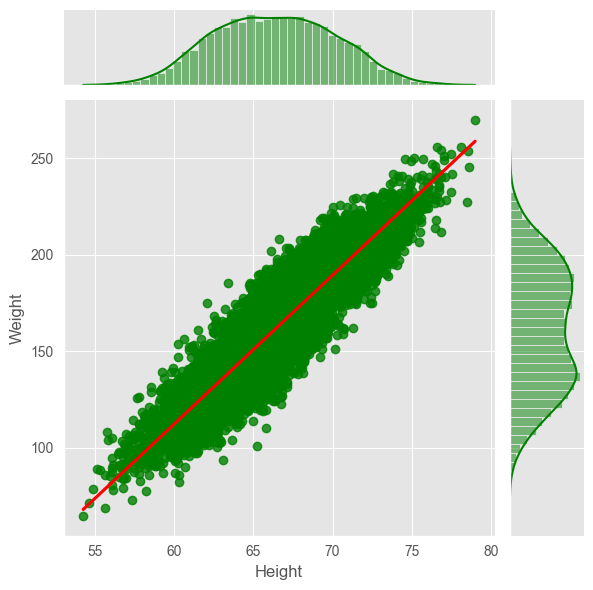

189.46502865111745


In [11]:
# Коэффициент корреляции Пирсона
correlation_matrix = df[['Height', 'Weight']].corr()
print(correlation_matrix)

# График разброса
sns.jointplot(x='Height', y='Weight', data=df, kind='reg', color='green', line_kws={'color': 'red'})
plt.show()

# Линейная регрессия
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df['Height'], df['Weight'], test_size=0.2, random_state=0)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Функция предсказания веса
def predict_weight(height):
    return model.predict([[height]])[0]

# Пример использования функции предсказания
print(predict_weight(70))

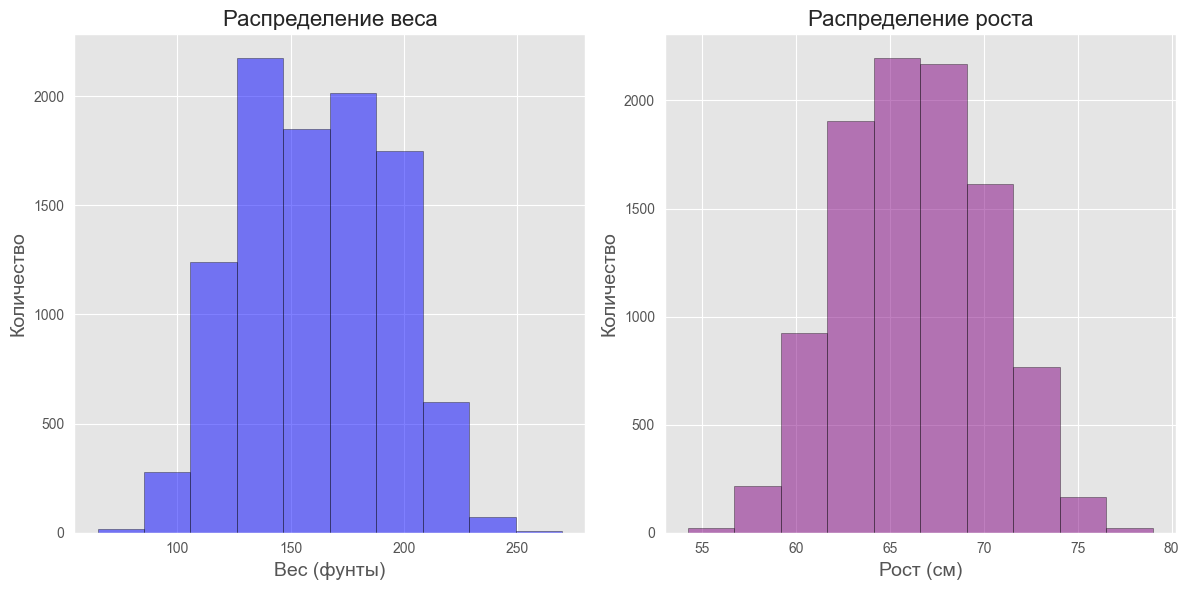

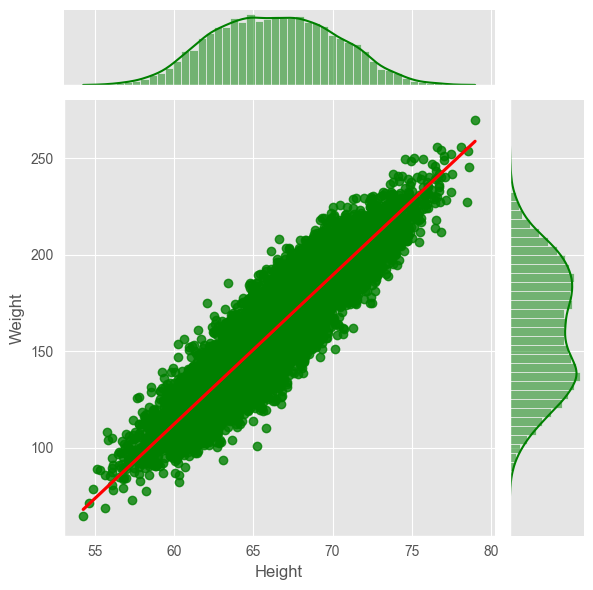

Среднеквадратичная ошибка: 12.105237384684955 фунтов
Прогнозируемый вес для роста 70 дюймы: 189.47 фунтов


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

# Загрузка данных
df = pd.read_csv('weight-height.csv')

# Гистограммы для веса и роста
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['Weight'].plot(kind='hist', color='blue', edgecolor='black', alpha=0.5)
plt.title('Распределение веса', size=16)
plt.xlabel('Вес (фунты)', size=14)
plt.ylabel('Количество', size=14)

plt.subplot(1, 2, 2)
df['Height'].plot(kind='hist', color='purple', edgecolor='black', alpha=0.5)
plt.title('Распределение роста', size=16)
plt.xlabel('Рост (см)', size=14)
plt.ylabel('Количество', size=14)

plt.tight_layout()
plt.show()

# График разброса и корреляционная матрица
sns.jointplot(x='Height', y='Weight', data=df, kind='reg', color='green', line_kws={'color': 'red'})
plt.show()

# Линейная регрессия
X = df['Height'].values.reshape(-1, 1)
y = df['Weight'].values.reshape(-1, 1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание веса на тестовой выборке
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка: {math.sqrt(mse)} фунтов')

# Функция предсказания веса по росту
def predict_weight(height):
    return model.predict([[height]])[0][0]

# Пример использования функции предсказания
height_to_predict = 70  # Рост в дюймах
predicted_weight = predict_weight(height_to_predict)
print(f'Прогнозируемый вес для роста {height_to_predict} дюймы: {predicted_weight:.2f} фунтов') 

In [21]:
correlation = df['Height'].corr(df['Weight'])
print(f'Коэффициент корреляции: {correlation}')
#это означает, что между двумя переменными полностью линейная связь и при увеличении одной переменной, другая также увеличивается.

Коэффициент корреляции: 0.9247562987409147


   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

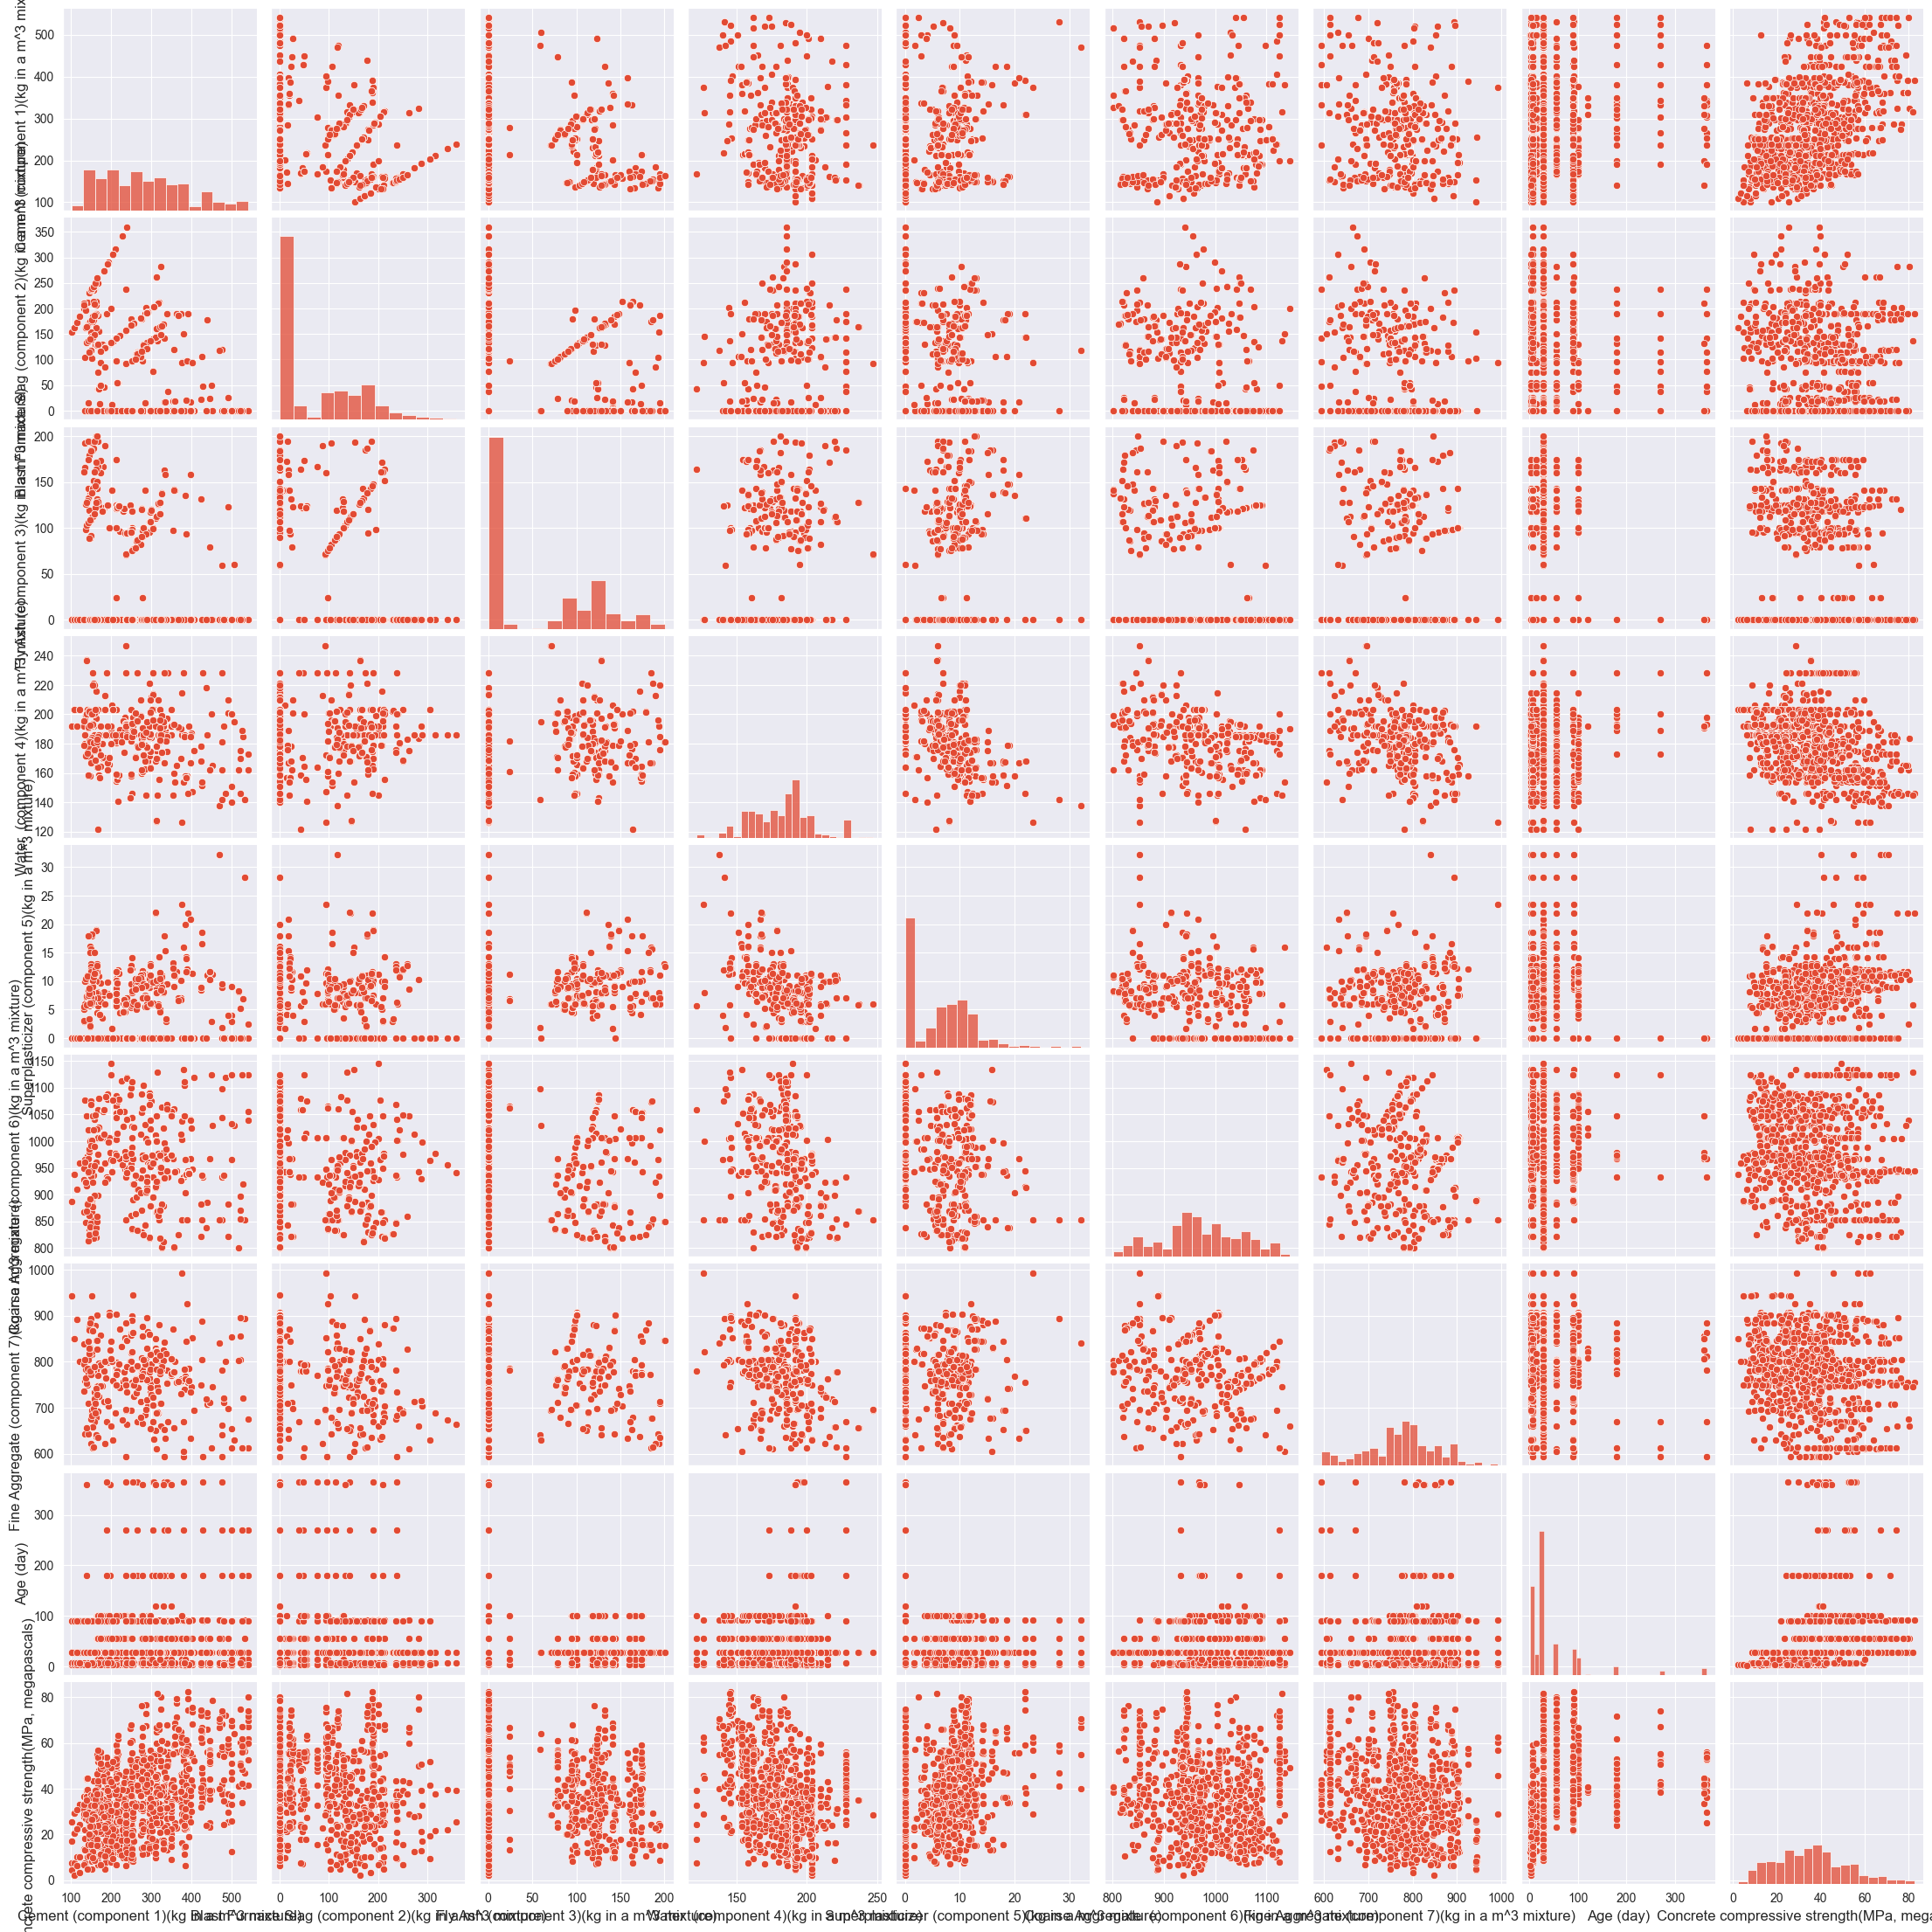

R^2 Score: 0.627566482342897


In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('Concrete.Data.csv')

# Просмотр данных
print(df.head())

# Избавление от пропусков
df = df.dropna()

# Определение формата данных
print(df.dtypes)

# Проверка корректности отображения
print(df.describe())

# Описание набора данных
print(df.info())

# Визуализация зависимости данных
sns.pairplot(df, diag_kind='auto')
plt.show()

# Разделение данных на обучающую и тестовую выборки
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# Загрузка данных
df = pd.read_csv('Concrete.Data.csv')

In [28]:
# Избавление от пропусков
df = df.dropna()

Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...                                                 ...       
1025                                              116.0       
1026                                                0.0       
1027                                              139.4       
1028                                              186.7       
1029                                              100.5       

      Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
1025                                        90.3   
1026                                       115.6   
1027                                       108.6   
1028                                         0.0   
1029                                        78.3   

      Water  (component 4)(kg in a m^3 mixture)  \
0                                         162.0   
1                                         162.0   
2                                         228.0   
3                                         228.0   
4                                         192.0   
...                                         ...   
1025                                      179.6   
1026                                      196.0   
1027                                      192.7   
1028                                      175.6   
1029                                      200.6   

      Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                   2.5     
1                                                   2.5     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
1025                                                8.9     
1026                                               10.4     
1027                                                6.1     
1028                                               11.3     
1029                                                8.6     

      Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                                1040.0      
1                                                1055.0      
2                                                 932.0      
3                                                 932.0      
4                                                 978.4      
...                                                 ...      
1025                                              870.1      
1026                                              817.9      
1027                                              892.4      
1028                                         

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

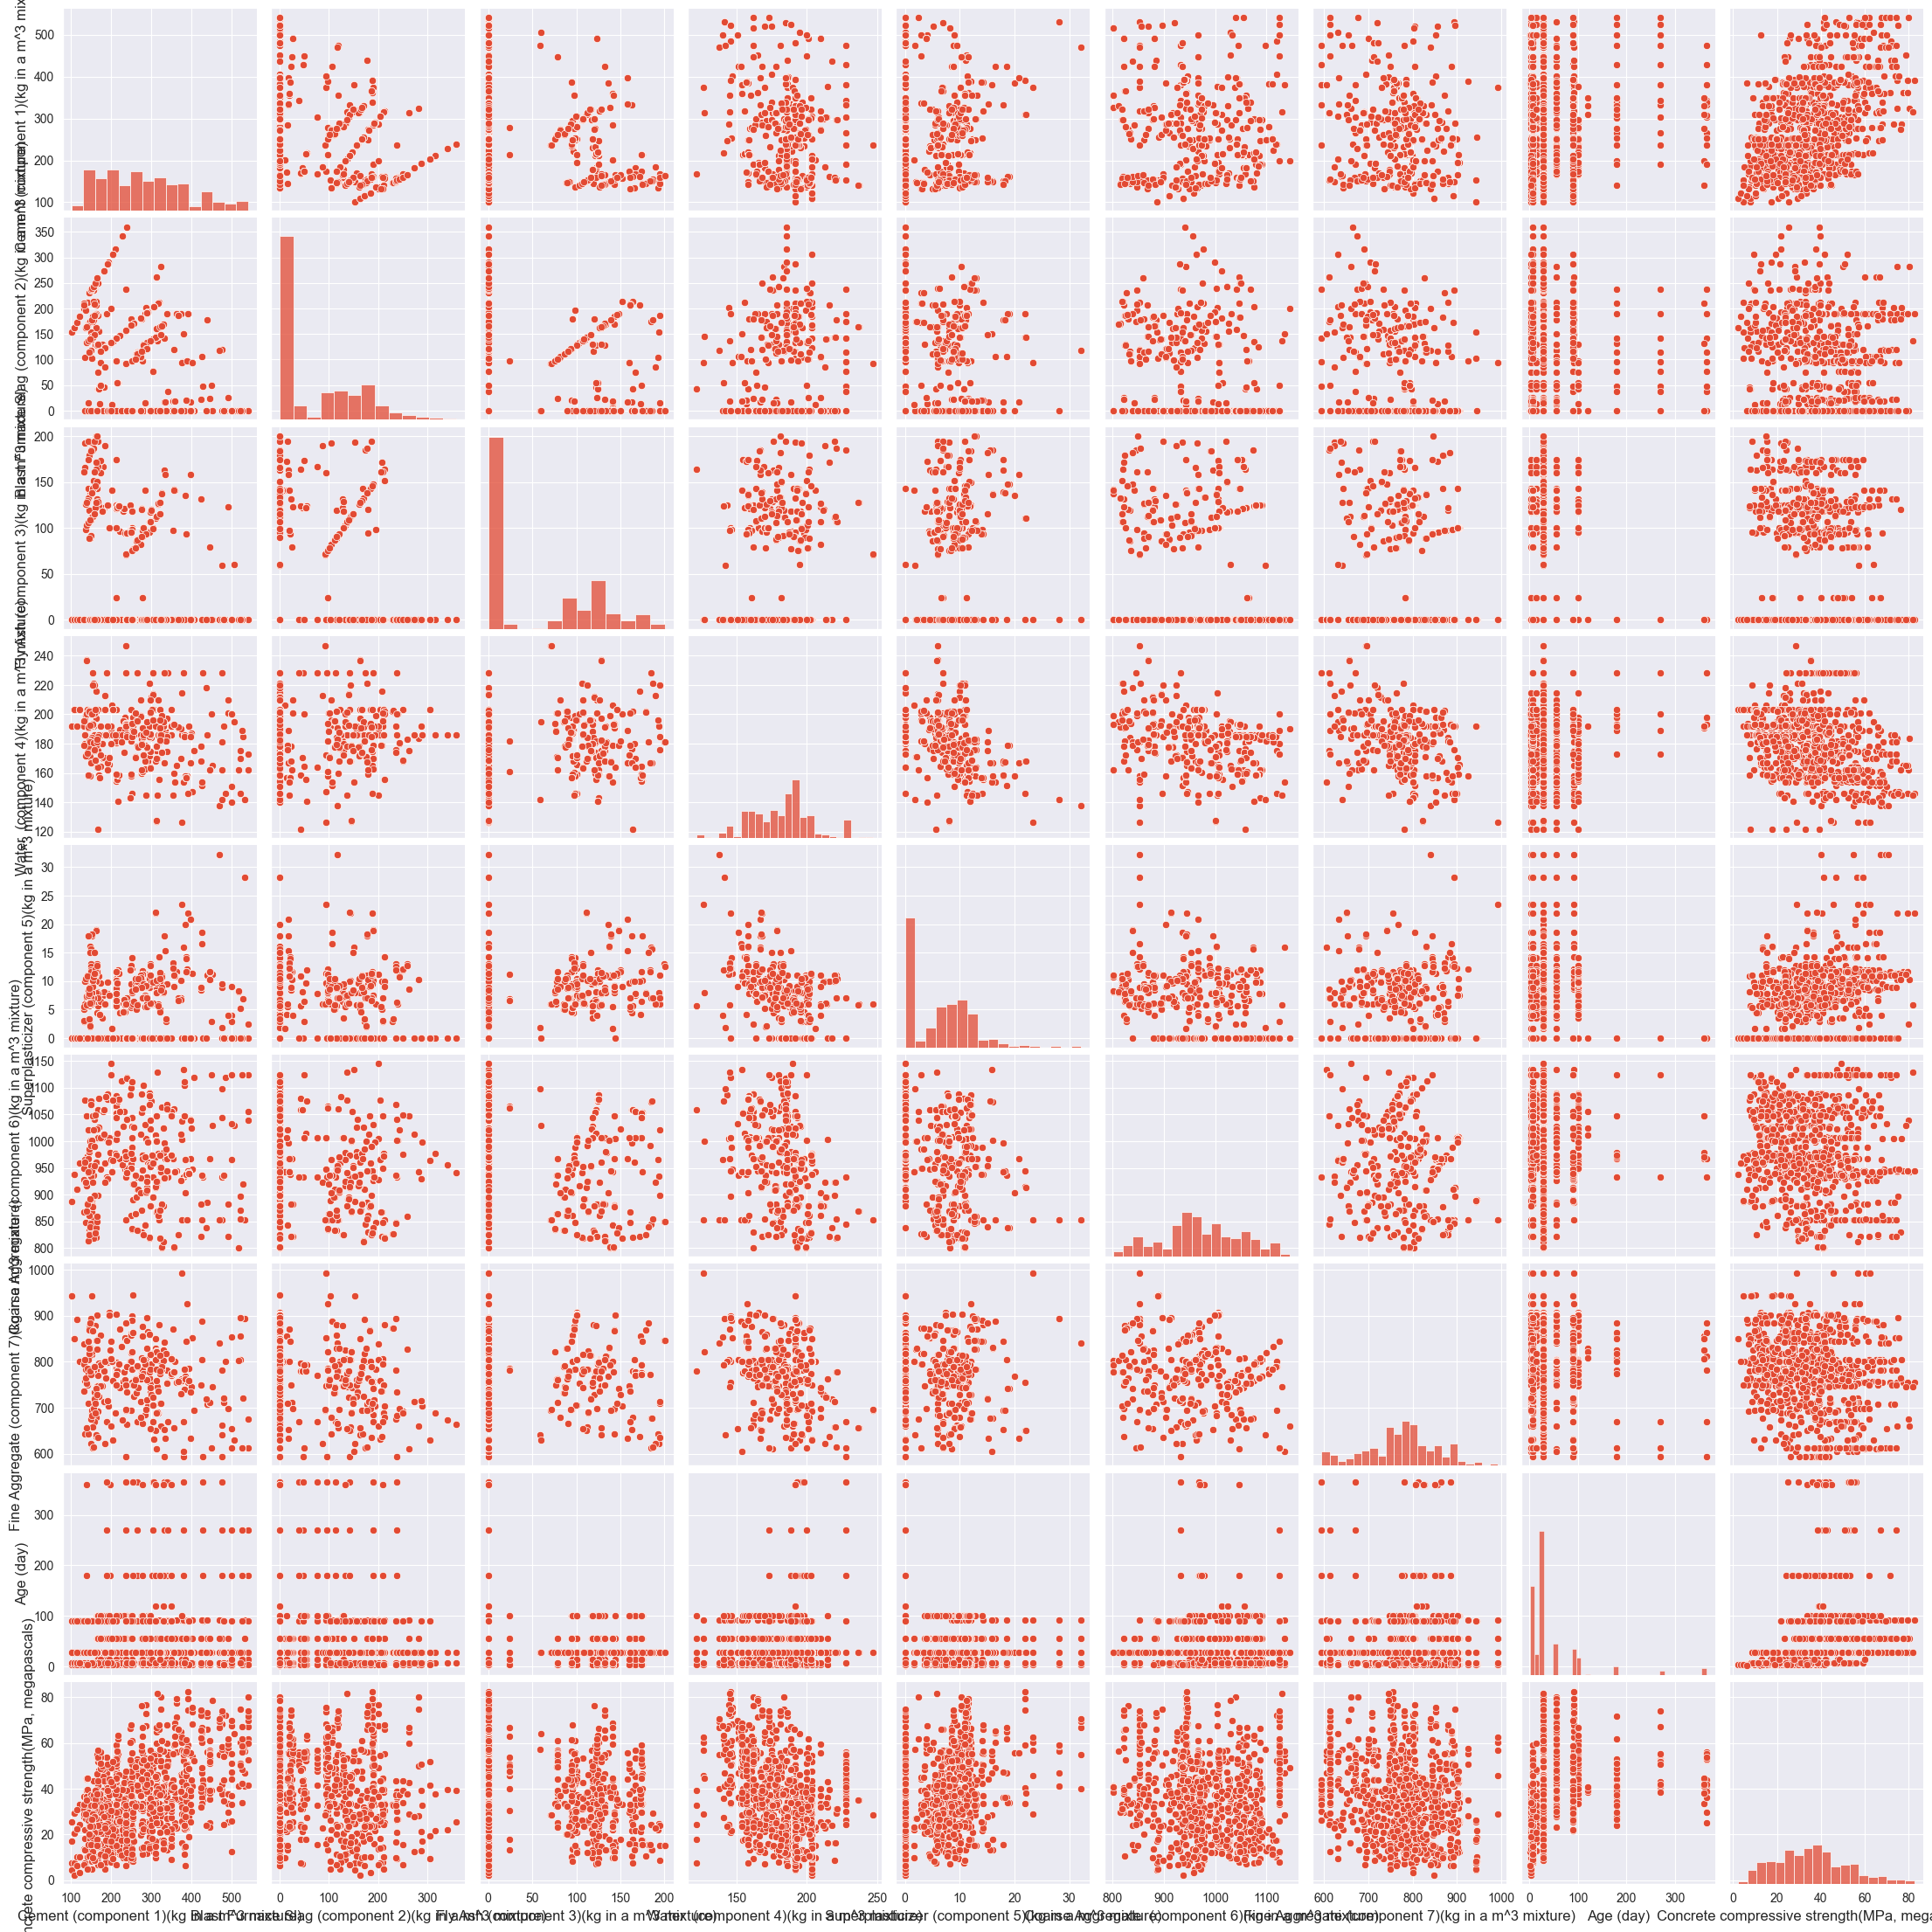

Коэффициент детерминации R^2: 0.627566482342897


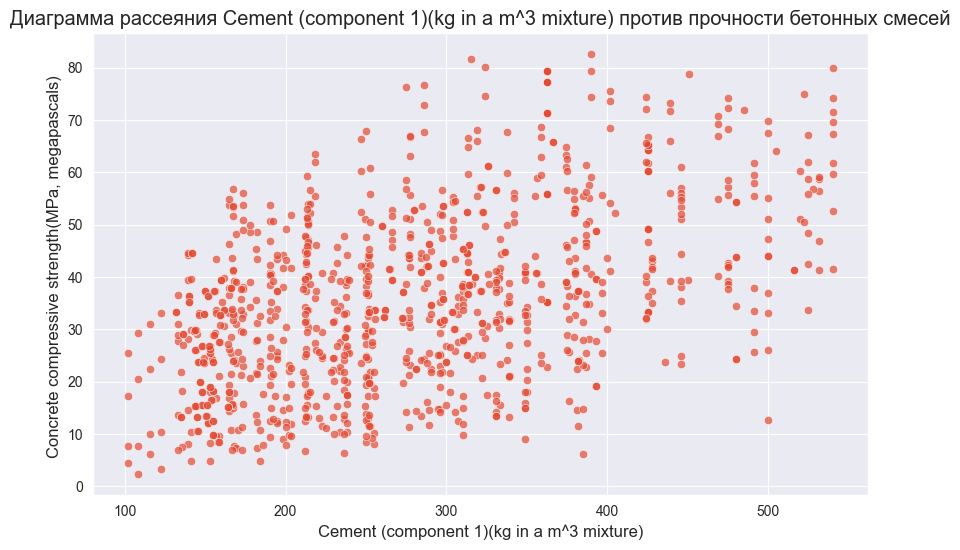

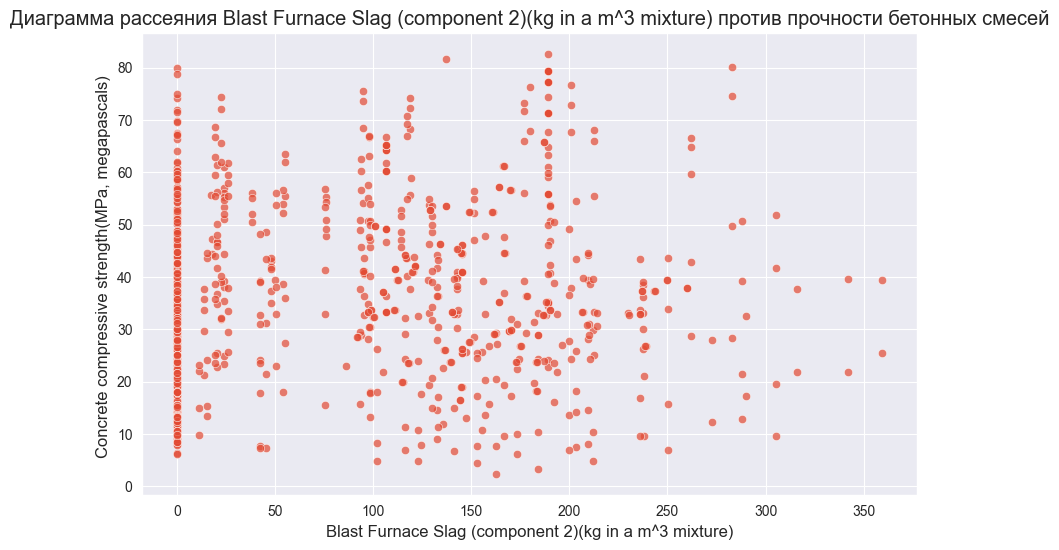

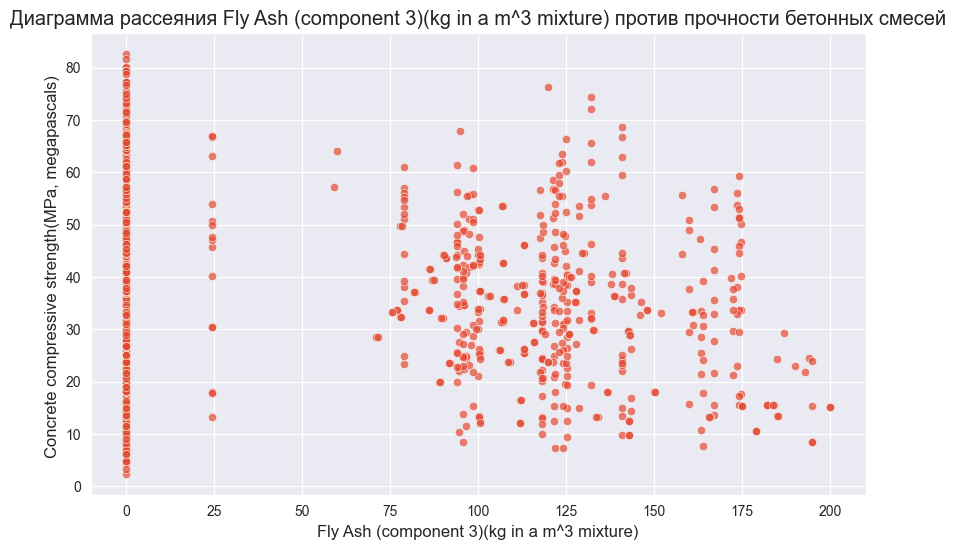

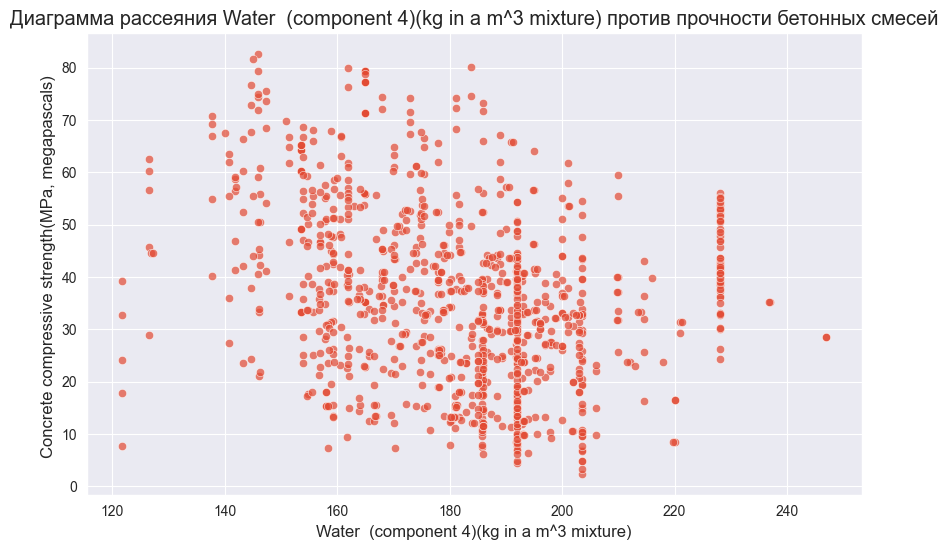

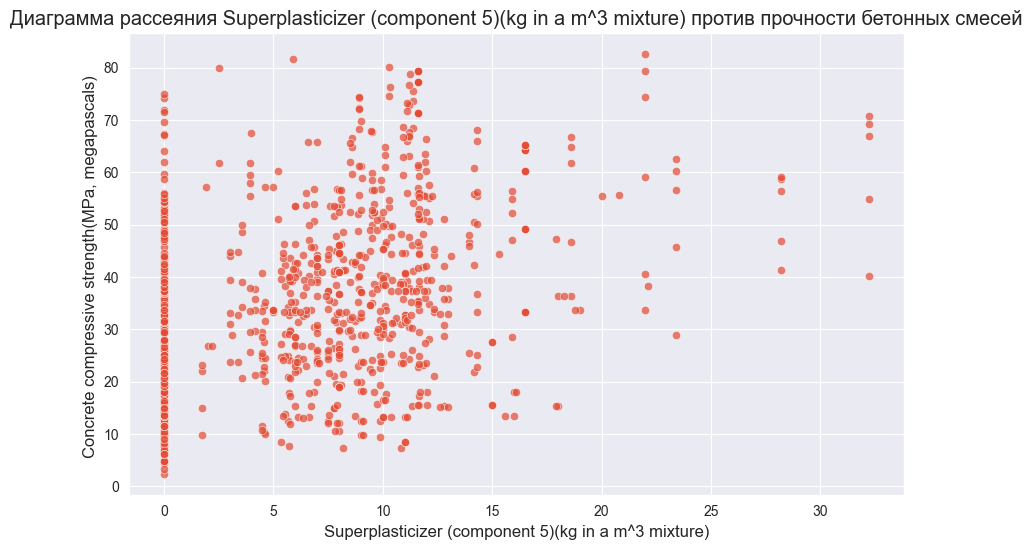

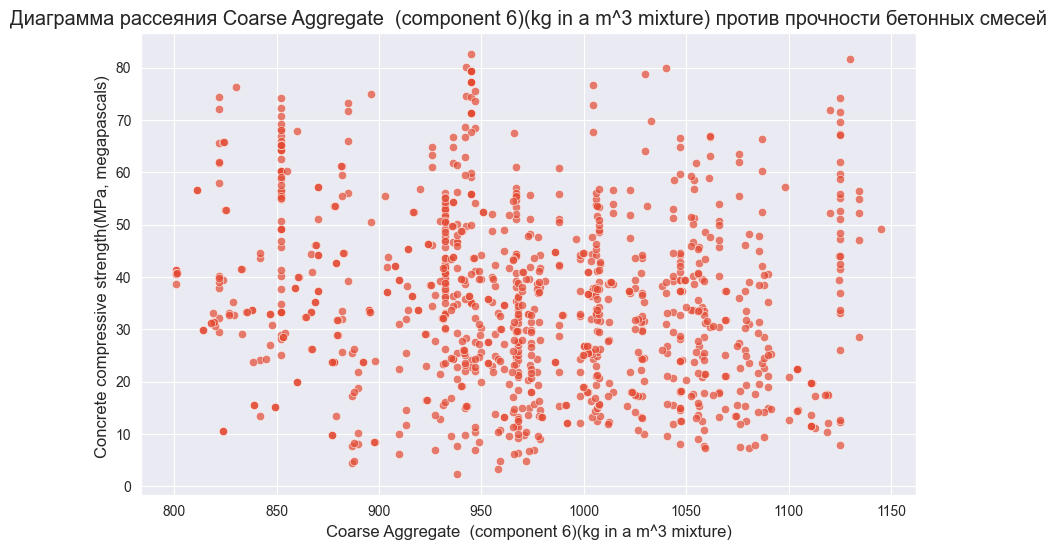

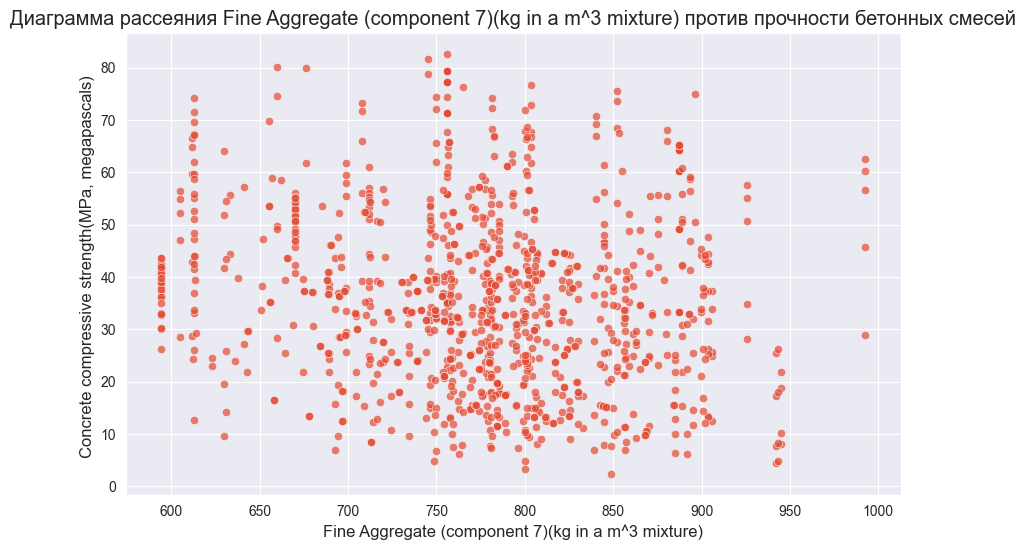

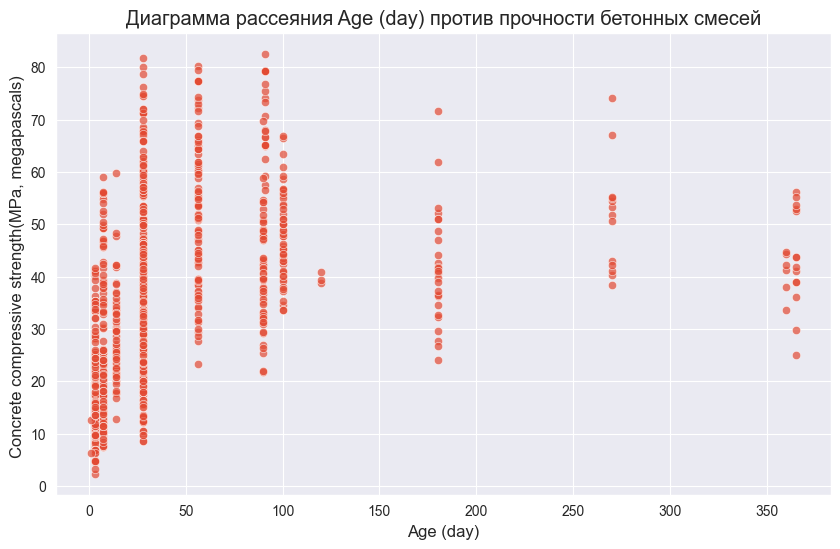

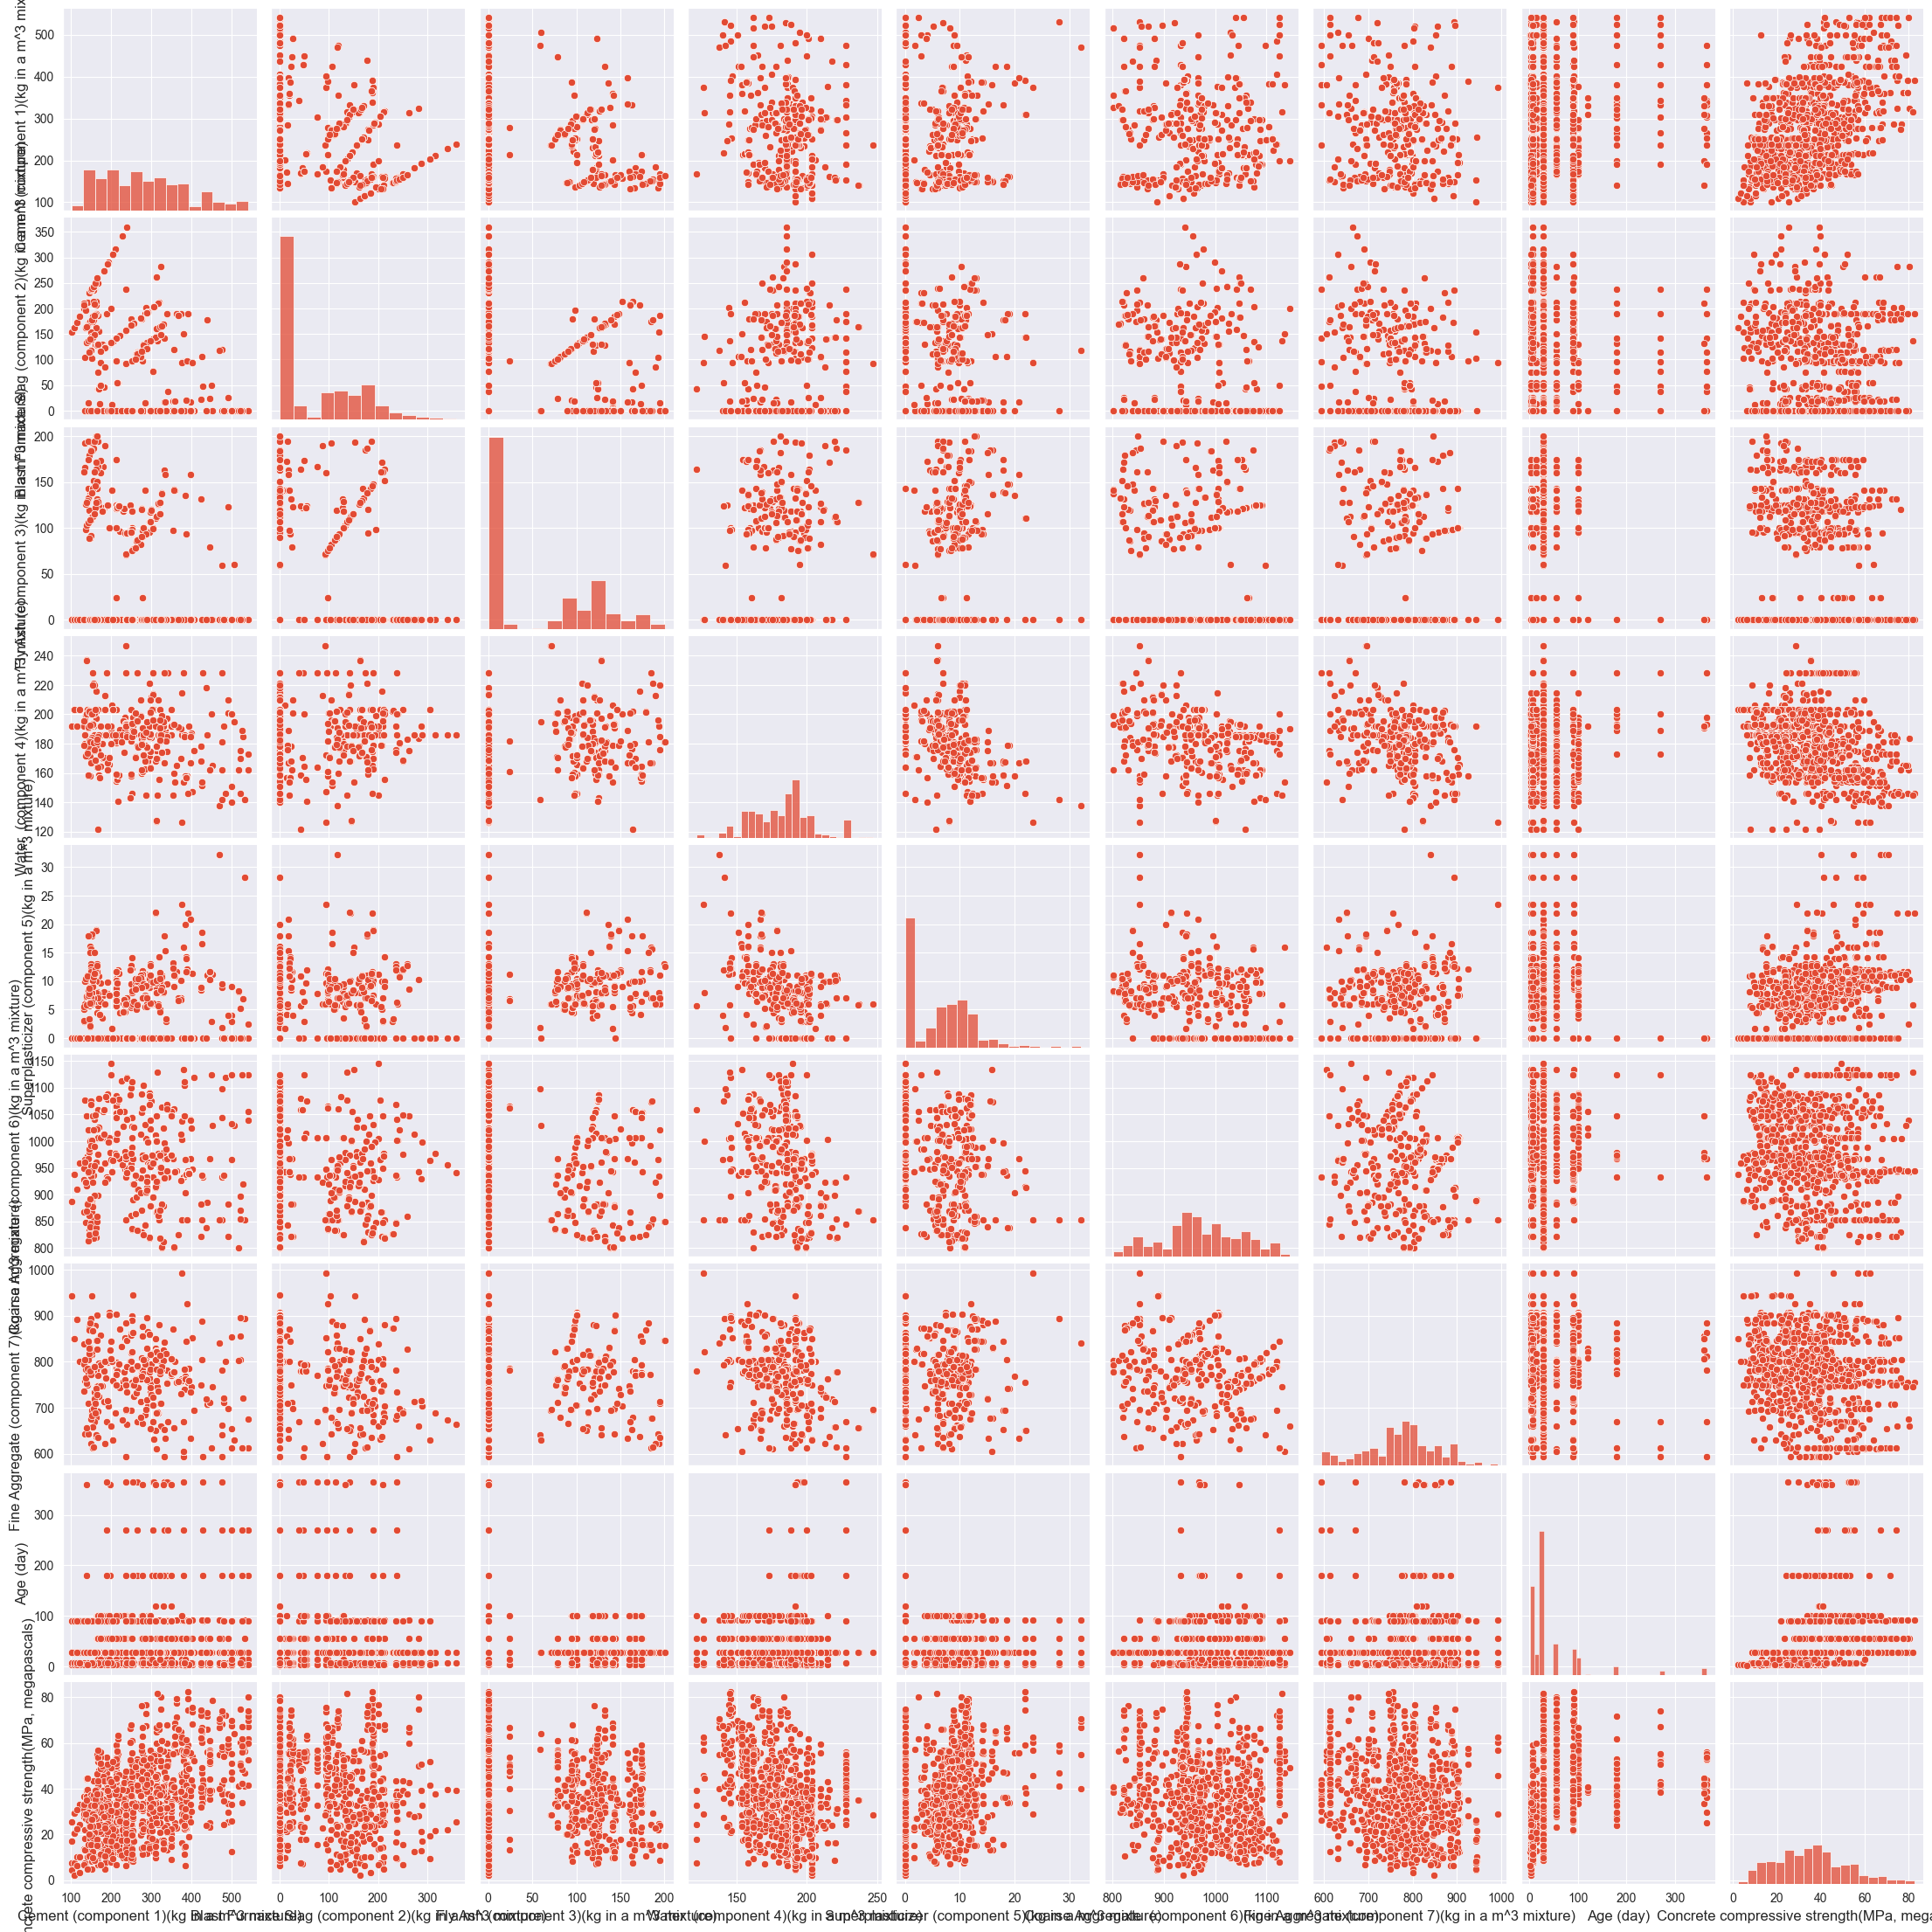

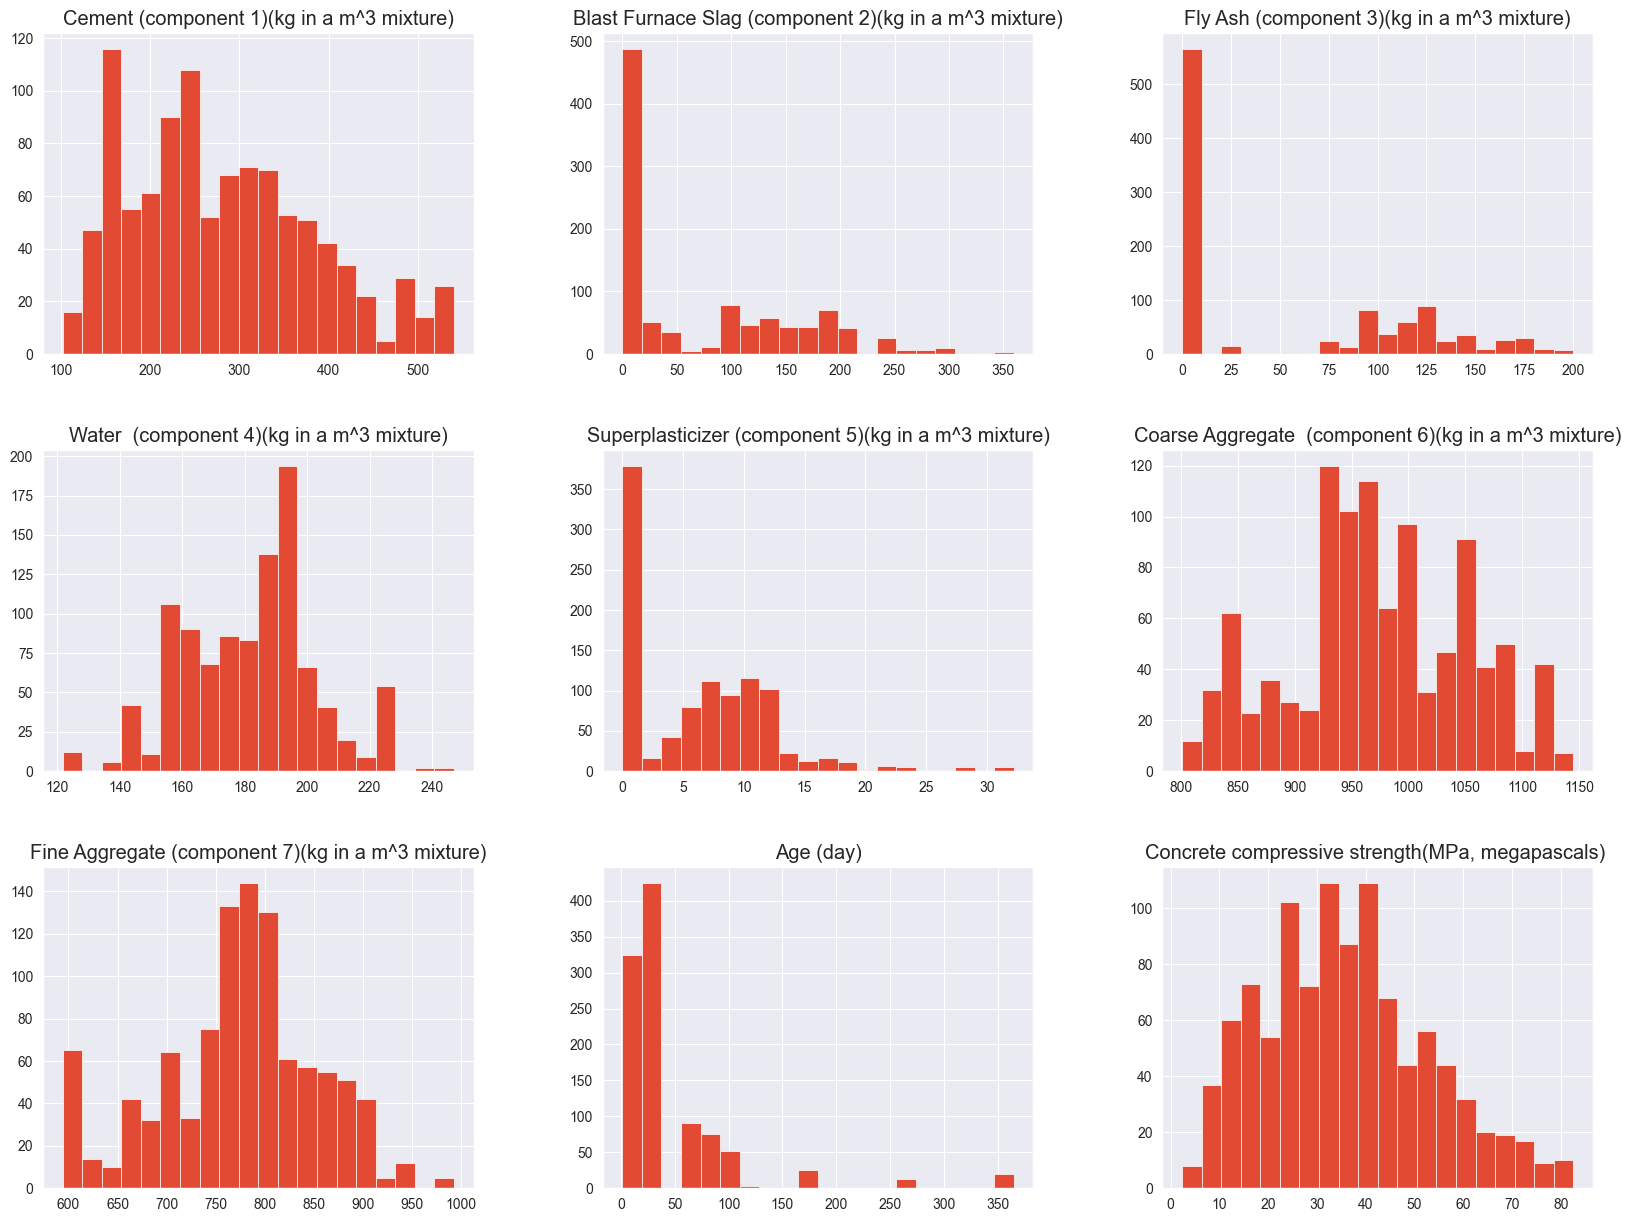

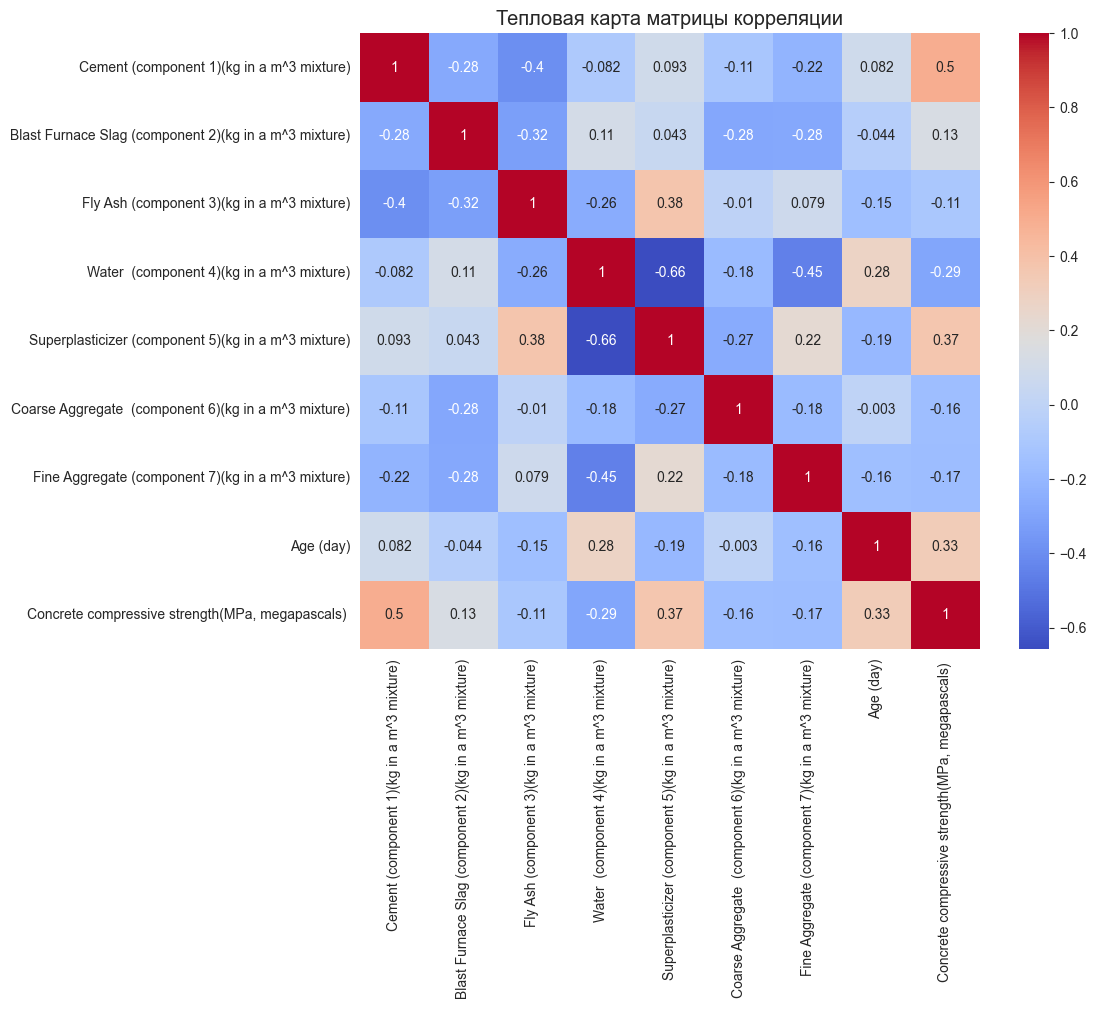

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
df = pd.read_csv('Concrete.Data.csv')

# Просмотр данных
print(df.head())

# Избавление от пропусков
df = df.dropna()

# Определение формата данных
print(df.dtypes)

# Проверка корректности отображения
print(df.describe())

# Описание набора данных
print(df.info())

# Визуализация зависимости данных
sns.pairplot(df, diag_kind='auto')
plt.show()

# Разделение данных на обучающую и тестовую выборки
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
r2 = r2_score(y_test, y_pred)
print(f'Коэффициент детерминации R^2: {r2}')

# Визуализация зависимости данных
# Диаграмма рассеяния для каждого признака с целевым значением
for column in df.columns:
    if column != 'Concrete compressive strength(MPa, megapascals) ':
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=column, y='Concrete compressive strength(MPa, megapascals) ', alpha=0.7)
        plt.title(f'Диаграмма рассеяния {column} против прочности бетонных смесей')
        plt.show()

# Матрица диаграмм рассеяния
sns.pairplot(df)
plt.show()

# Гистограммы для каждого признака
df.hist(bins=20, figsize=(20, 15))
plt.show()

# Тепловая карта для корреляции между признаками
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта матрицы корреляции')
plt.show()